### 3-DOF Manipulator Design Calculator - Forward Kinematics

from IPython.display import Image

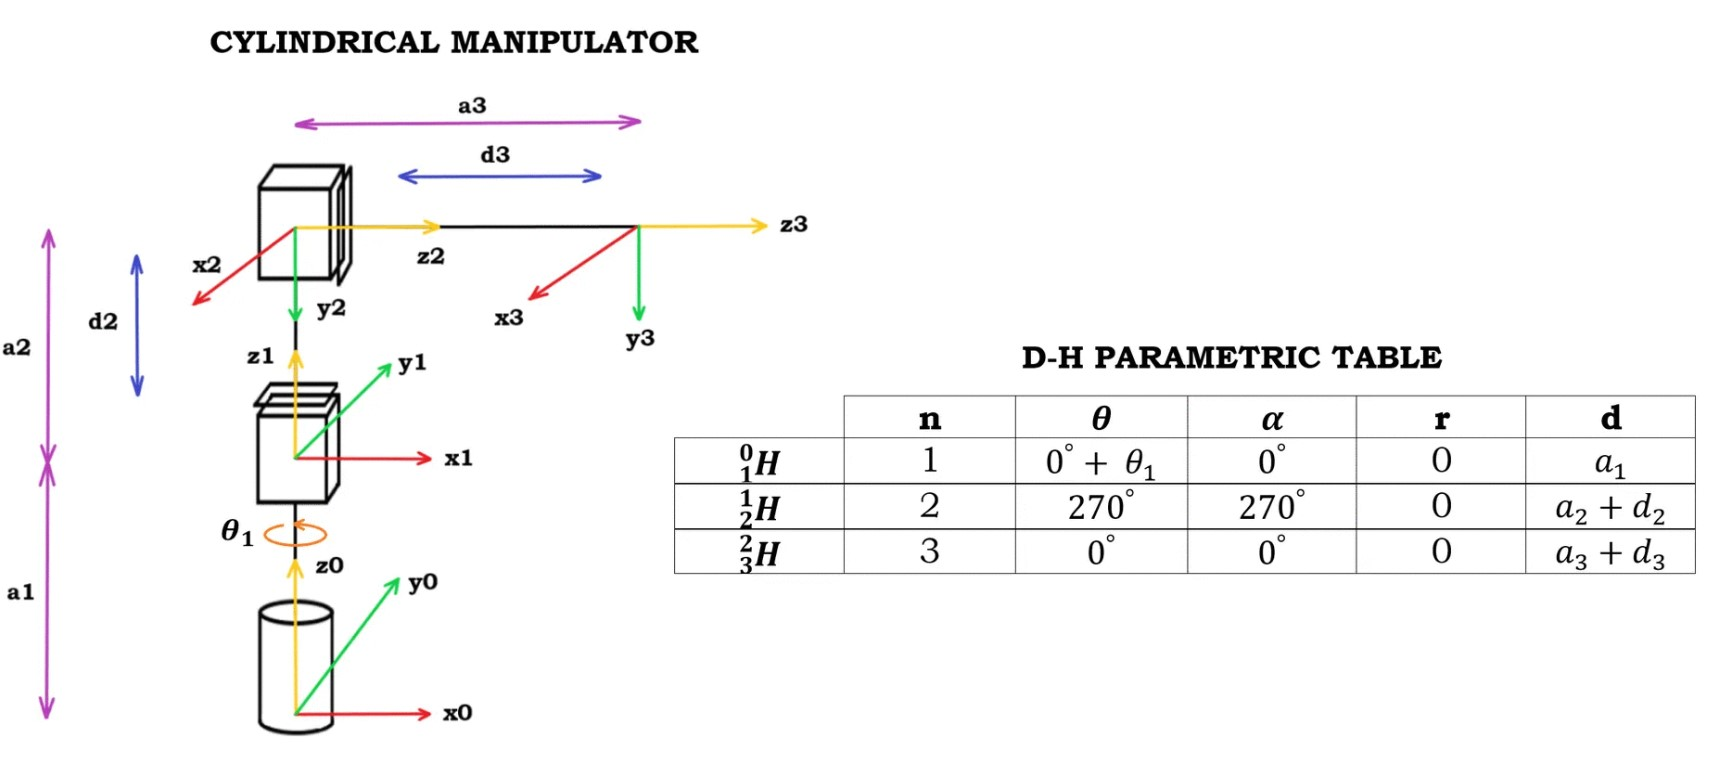

In [12]:
from IPython.display import Image
Image(filename="CYLINDRICAL-3.jpg",width=700,height=300)

In [35]:
import numpy as np
import math
import PySimpleGUI as sg
import pandas as pd

# GUI code
sg.theme('DarkRed')
 
# Excel read code
EXCEL_FILE = 'Cylindrical_V3_FK.xlsx'
df = pd.read_excel(EXCEL_FILE)


#Layout of GUI

Main_layout = [
    [sg.Push(), sg.Text('Cylindrical RPP MEXE Calculator', font = ("Garamond", 20)), sg.Push()],
    [sg.Text('Forward Kinematics Calculator', font = ("Garamond", 12))],
    [sg.Button('Click this before Solving \n Forward Kinematics', font = ("Garamond", 14), size=(41,0), button_color=('black', 'Gray'))],
    [sg.Text('Fill out the following fields: ', font = ("Garamond", 10))],

    
    [sg.Text('a1 = ', font = ("Garamond", 10)),sg.InputText('0', key='a1', size=(24,10)),
     sg.Text('T1= ',font = ("Garamond", 10)),sg.InputText('0', key='T1', size=(24,10)),
     sg.Push(), sg.Button('Jacobian Matrix (J)', disabled = True, font = ("Garamond", 12), size=(15,2), button_color=('black', 'Gray')),
     sg.Button('Det(J)',disabled = True, font = ("Garamond", 12), size=(15,2), button_color=('black', 'Gray')), sg.Push()],
     
     

    [sg.Text('a2 = ', font = ("Garamond", 10)),sg.InputText('0', key='a2', size=(24,10)),
     sg.Text('d2= ',font = ("Garamond", 10)),
     sg.InputText('0', key='d2', size=(24,10)),
     sg.Push(), sg.Button('Inverse of J',disabled = True, font = ("Garamond", 12), size=(15,2), button_color=('black', 'Gray')),
     sg.Button('Transpose of J',disabled = True, font = ("Garamond", 12), size=(15,2), button_color=('black', 'Gray')), sg.Push()],


    [sg.Text('a3 = ', font = ("Garamond", 10)),sg.InputText('0', key='a3', size=(24,10)),
     sg.Text('d3= ',font = ("Garamond", 10)),sg.InputText('0', key='d3', size=(24,10)),
     sg.Push(), sg.Button('Inverse Kinematics', font = ("Garamond", 12), size=(15,3), button_color=('black', '#F397A8')),
     sg.Button('Path and Trajectory Planning' , font = ("Garamond", 12), size=(15,3), button_color=('black', '#F397A8')), sg.Push()],


    [sg.Button('Solve Forward Kinematics',disabled = True, size=(41,0), tooltip = 'Go first to "Click this before Solving Forward Kinematics"!', font = ("Garamond", 15), button_color=('black', '#F397A8'))],
    [sg.Text('                             OR', font = ("Garamond", 20))],
    [sg.Button('Solve Inverse Kinematics', size=(41,0), tooltip = 'Make Sure To have Proper Values of X,Y,Z', font = ("Garamond", 15), button_color=('black', '#F397A8')),sg.Push()],
    


    [sg.Frame('Position Vector: ',[[
        sg.Text('X = ', font = ("Garamond", 10)), sg.InputText(key='X', size=(13,1)),
        sg.Text('Y = ', font = ("Garamond", 10)), sg.InputText(key='Y', size=(13,1)),
        sg.Text('Z = ', font = ("Garamond", 10)), sg.InputText(key='Z', size=(13,1))]])],
     

    [sg.Frame('H_03 Tranformation Matrix = ',[[sg.Output(size=(60,12))]]),
    sg.Push(),sg.Image('CYLINDRICAL_V3.gif'), sg.Push()],
    [sg.Push(),sg.Submit(font = ("Garamond", 10)),sg.Exit(font = ("Garamond", 10)),sg.Push()]
     

    
    ]

    
#Window
window = sg.Window('Cylindrical Manipulator Forward Kinematics Solver', Main_layout, resizable=True)

# Inverse Kinematics Window function

def Inverse_Kinematics_window():
    sg.theme('LightBlue')

    EXCEL_FILE = 'Cylindrical_V3_IK.xlsx'
    IK_df = pd.read_excel(EXCEL_FILE)

    IK_layout = [
        [sg.Push(),sg.Text('Inverse Kinematics', font = ("Garamond", 15)),sg.Push()],
        [sg.Text('Fill out the following fields: ', font = ("Garamond", 10))],
        [sg.Text('a1 = ', font = ("Garamond", 10)),sg.InputText('0', key='a1', size=(8,10)),
        sg.Text('mm',font = ("Garamond", 10)),
            sg.Text('X = ', font = ("Garamond", 10)),sg.InputText('0', key='X', size=(8,10)),
            sg.Text('mm',font = ("Garamond", 10))],

        [sg.Text('a2 = ', font = ("Garamond", 10)),sg.InputText('0', key='a2', size=(8,10)),
        sg.Text('mm',font = ("Garamond", 10)),
            sg.Text('Y = ', font = ("Garamond", 10)),sg.InputText('0', key='Y', size=(8,10)),
            sg.Text('mm',font = ("Garamond", 10))],

        [sg.Text('a3 = ', font = ("Garamond", 10)),sg.InputText('0', key='a3', size=(8,10)),
        sg.Text('mm',font = ("Garamond", 10)),
            sg.Text('Z = ', font = ("Garamond", 10)),sg.InputText('0', key='Z', size=(8,10)),
            sg.Text('mm',font = ("Garamond", 10))],

        [sg.Button('Solve Inverse Kinematics', font = ("Garamond", 15), size=(41,0), button_color=('black', '#F397A8')),sg.Push()],

        [sg.Frame('Position Vector: ',[[
            sg.Text('Th1 = ', font = ("Garamond", 10)),sg.InputText(key='IK_Th1', size=(10,1)),
            sg.Text('degrees', font = ("Garamond", 10)),

            sg.Text('d2 = ', font = ("Garamond", 10)),sg.InputText(key='IK_d2', size=(10,1)),
            sg.Text('mm', font = ("Garamond", 10)),

            sg.Text('d3 = ', font = ("Garamond", 10)),sg.InputText(key='IK_d3', size=(10,1)),
            sg.Text('mm', font = ("Garamond", 10)),]])],
        [sg.Push(),sg.Submit(font = ("Garamond", 10)),sg.Exit(font = ("Garamond", 10)),sg.Push()]

    ]

    # Window code
    Inverse_Kinematics_window = sg.Window('Inverse Kinematics',IK_layout)

    while True:
        event, values = Inverse_Kinematics_window.read()
        if event == sg.WIN_CLOSED or event == 'Exit':
            break
        elif event == 'Solve Inverse Kinematics':
                a1 = float(values['a1'])
                a2 = float(values['a2'])
                a3 = float(values['a3'])

                X = float(values['X'])
                Y = float(values['Y'])
                Z = float(values['Z'])

                try:
                    Th1 = (np.arctan(Y/X))
                except:
                    Th1 = -1
                    sg.popup('Warning! Present values cause error.')
                    sg.popup('Please restart the GUI then assign proper values!')
                    break

                ### Inverse Kinematics
                #Th1
                
                Th1_a = np.arctan(Y0_3/X0_3)
                Th1 = np.degrees(Th1_a)
                #d2
                d2 = Z0_3 - a1 - a2

                #d3
                d3 = math.sqrt((X0_3**2)+(Y0_3**2)) - a3

                Th1 = Inverse_Kinematics_window['IK_Th1'].Update(np.around(Th1,3))
                d2 = Inverse_Kinematics_window['IK_d2'].Update(np.around(d2,3))
                d3 = Inverse_Kinematics_window['IK_d3'].Update(np.around(d3,3))                                               

        elif event == 'Submit':
                IK_df = IK_df.append(values, ignore_index=True)
                IK_df.to_excel(EXCEL_FILE, index=False)
                sg.popup('Data Saved!')
    Inverse_Kinematics_window.close()


# Variable codes for disabling buttons

disable_FK = window['Solve Forward Kinematics']
disable_J = window['Jacobian Matrix (J)']
disable_DetJ = window['Det(J)']
disable_IV = window['Inverse of J']
disable_TJ = window['Transpose of J']
disable_PT = window['Path and Trajectory Planning']


def clear_input():
    for key in values:
        window[key]('')
    return None

while True:
    event,values = window.read()
    if event == sg.WIN_CLOSED or event == 'Exit':
        break

    elif event == 'Click this before Solving \n Forward Kinematics':
        disable_FK.update(disabled=False)
        disable_J.update(disabled=True)
        disable_DetJ.update(disabled=True)
        disable_IV.update(disabled=True)
        disable_TJ.update(disabled=True)
        disable_PT.update(disabled=True)


    elif event == 'Solve Forward Kinematics':
        # Foward Kinematic Codes
        # Link Lengths in cm
        a1 = float(values['a1'])
        a2 = float(values['a2'])
        a3 = float(values['a3'])

        # Joint Variable Thetas in degrees
        T1 = float(values['T1'])

        # for d
        d2 = float(values['d2'])
        d3 = float(values['d3'])

        # Joint Variable Thetas in radians
        T1 = ((T1)/180.0)*np.pi

        # Theta, alpha,r,d
        PT = [[(0.0/180.0)*np.pi+float(T1),(0.0/180.0)*np.pi,0,float(a1)],
                [(270.0/180.0)*np.pi,(270.0/180.0)*np.pi,0,float(a2)+float(d2)],
                [(0.0/180.0)*np.pi,(0.0/180.0)*np.pi,0,float(a3)+float(d3)]]

        #D-H Notation Formula for HTM

        i = 0
        H0_1 = [[np.cos(PT[i][0]),-np.sin(PT[i][0])*np.cos(PT[i][1]),np.sin(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.cos(PT[i][0])],
                [np.sin(PT[i][0]),np.cos(PT[i][0])*np.cos(PT[i][1]),-np.cos(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.sin(PT[i][0])],
                [0,np.sin(PT[i][1]),np.cos(PT[i][1]),PT[i][3]],
                [0,0,0,1]]

        i = 1
        H1_2 = [[np.cos(PT[i][0]),-np.sin(PT[i][0])*np.cos(PT[i][1]),np.sin(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.cos(PT[i][0])],
                [np.sin(PT[i][0]),np.cos(PT[i][0])*np.cos(PT[i][1]),-np.cos(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.sin(PT[i][0])],
                [0,np.sin(PT[i][1]),np.cos(PT[i][1]),PT[i][3]],
                [0,0,0,1]]

        i = 2
        H2_3 = [[np.cos(PT[i][0]),-np.sin(PT[i][0])*np.cos(PT[i][1]),np.sin(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.cos(PT[i][0])],
                [np.sin(PT[i][0]),np.cos(PT[i][0])*np.cos(PT[i][1]),-np.cos(PT[i][0])*np.sin(PT[i][1]),PT[i][2]*np.sin(PT[i][0])],
                [0,np.sin(PT[i][1]),np.cos(PT[i][1]),PT[i][3]],
                [0,0,0,1]]

        H0_1 = np.matrix(H0_1)

        H0_2 = np.dot(H0_1,H1_2)
        H0_3 = np.dot(H0_2,H2_3)

        print("H0_3=")
        print(np.matrix(H0_3))

        X0_3 = H0_3[0,3]
        print("X = ")
        print (X0_3)

        Y0_3 = H0_3[1,3]
        print("Y = ")
        print (Y0_3)

        Z0_3 = H0_3[2,3]
        print("Z = ")
        print (Z0_3)

        disable_J.update(disabled=False)
        disable_PT.update(disabled=False)

        
    elif event == 'Submit' :
        df = df.append(values, ignore_index=True)
        df.to_excel(EXCEL_FILE, index=False)
        sg.popup('Data saved!')
    elif event == 'Jacobian Matrix (J)':
        
        ### Jacobian Matrix
        
        try:
            H0_1 = np.matrix(H0_1) 
        except:
            H0_1 = -1 #NAN
            sg.popup('Warning!')
            sg.popup('Restart Gui then go first "Click this before Solving Forward Kinematics"!')
            break

        ### 1. Linear / Prismatic Vectors
        Z_1 = [[0],[0],[1]] # The [0,0,1] vector
        iden = [[1,0,0],[0,1,0],[0,0,1]] 

        # Row 1 - 3, Column 1
        J1a = np.dot(iden,Z_1)
        # print(J1a)

        J1b_1 = H0_3[0:3,3:]
        J1b_1 = np.matrix(J1b_1)

        J1b_2 = [[0],[0],[0]]

        J1b = J1b_1 - J1b_2

        J1 = [[(J1a[1,0]*J1b[2,0])-(J1a[2,0]*J1b[1,0])],
              [(J1a[2,0]*J1b[0,0])-(J1a[0,0]*J1b[2,0])],
              [(J1a[0,0]*J1b[1,0])-(J1a[1,0]*J1b[0,0])]]
        # print("J1 = ")
        # print(np.matrix(J1))

        # Row 1 - 3, Column 2
       

        J2 = H0_1[0:3,0:3]
        J2 = np.dot(J2,Z_1)
        # print("J2 = ")
        # print(J2)   

        # Row 1 - 3, Column 3

        J3 = H0_2[0:3,0:3]
        J3 = np.dot(J3,Z_1)
        # print("J3 = ")
        # print(J3)


        ### 2. Rotation / Orientation Vectors
        J4= np.dot(iden,Z_1)
        # print("J4 = ")
        # print(J4)

        J5 = [[0],[0],[0]]
        J5 = np.matrix(J5)
        # print("J5 = ")
        # print(J5)

        J6 = [[0],[0],[0]]
        J6 = np.matrix(J6)
        # print("J6 = ")
        # print(J6)

        ### 3. Concatenated Jaccobian Matrix
        JM1 = np.concatenate((J1,J2,J3),1)
        # print(JM1)

        JM2 = np.concatenate((J4,J5,J6),1)
        # print(JM2)

        J = np.concatenate((JM1,JM2),0)
        # print("J = ")
        (J)

        sg.popup ('J = ', J)
        DJ = np.linalg.det(JM1)
        if DJ == 0.0 or DJ == -0.0:
           
           disable_IV.update(disabled=True)
           sg.popup('Warning: Jacobian Matrix is Non-Invertible')
        elif DJ !=0.0 or DJ != -0.0:
            disable_IV.update(disabled=False)

        
        disable_J.update(disabled=True)
        disable_DetJ.update(disabled=False)
        disable_TJ.update(disabled=False)

    elif event == 'Det(J)':
        try:
            JM1 = np.concatenate((J1,J2,J3),1) 
        except:
            JM1 = -1 #NAN
            sg.popup('Warning!')
            sg.popup('Restart Gui then go first "Click this before Solving Forward Kinematics"!')
            break
          
        DJ = np.linalg.det(JM1)
        #print("D = ",DJ)
        sg.popup('DJ = ',DJ)

        if DJ == 0.0 or DJ == -0.0:
           
           disable_IV.update(disabled=True)
           sg.popup('Warning: Jacobian Matrix is Non-Invertible')

    elif event == 'Inverse of J':
       
        try:
            JM1 = np.concatenate((J1,J2,J3),1) 
        except:
            JM1 = -1 #NAN
            sg.popup('Warning!')
            sg.popup('Restart Gui then go first "Click this before Solving Forward Kinematics"!')
            break

        IV = np.linalg.inv(JM1)
        #print("IV = ")
        #print(IV)
        sg.popup('IV = ',IV)

    elif event == 'Transpose of J':
      
        try:
            JM1 = np.concatenate((J1,J2,J3),1) 
        except:
            JM1 = -1 #NAN
            sg.popup('Warning!')
            sg.popup('Restart Gui then go first "Click this before Solving Forward Kinematics"!')
            break
       
        TJ = np.transpose(JM1)
        #print("TJ = ")
        #print(TJ)

        sg.popup('TJ = ',TJ)

    elif event == 'Solve Inverse Kinematics':
        Inverse_Kinematics_window()
        
window.close()